In [2]:
#Problem: Predict the class of the flower based on available attributes.
#https://www.analyticsvidhya.com/blog/2018/05/24-ultimate-data-science-projects-to-boost-your-knowledge-and-skills/

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.externals import joblib

In [18]:
columns = ["sepal_length","sepal_width","petal_length","petal_width","class"]
df = pd.read_csv('iris.data.txt', names=columns)
df.describe()

print(df.shape)

(150, 5)


In [20]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [22]:
X = df.drop(['class'],1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=100, 
                                                    stratify=y)

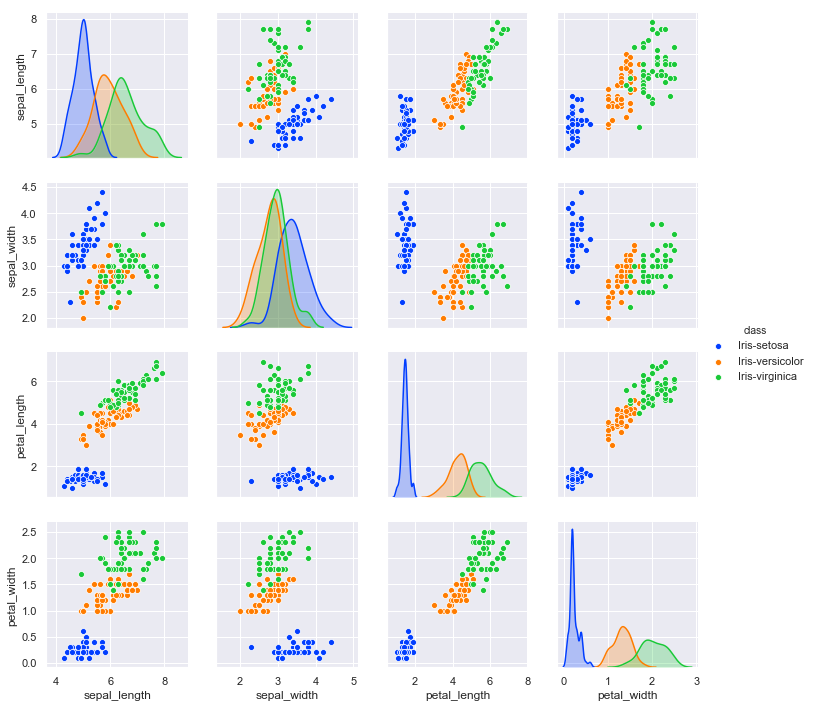

In [27]:
sns.set(style="darkgrid")
sns.pairplot(df, hue = "class", palette="bright")
plt.show()

In [32]:
piris = pd.melt(df, "class", var_name="measurement") 
piris.head()

,class,measurement,value
0,Iris-setosa,sepal_length,5.1
1,Iris-setosa,sepal_length,4.9
2,Iris-setosa,sepal_length,4.7
3,Iris-setosa,sepal_length,4.6
4,Iris-setosa,sepal_length,5.0


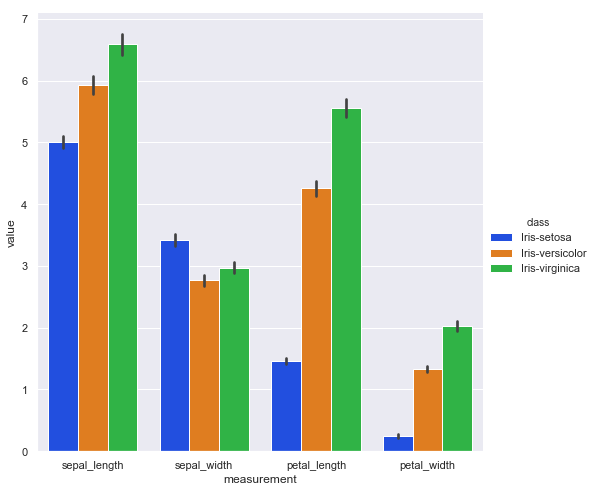

In [37]:
sns.catplot(x="measurement", y="value", hue="class", data=piris, height=7, kind="bar",palette="bright") 
plt.show()

In [40]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [46]:
from sklearn.datasets import load_iris
iris=load_iris()
tree.export_graphviz(clf,
out_file='iris.dot',  feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)

#out_file can be read using Graphviz

In [47]:
y_pred = clf.predict(X_test)

In [49]:
print("Accuracy Score");
print(accuracy_score(y_test,y_pred)*100);
print("Model Score");
print(clf.score(X_test,y_test));

Accuracy Score
93.33333333333333
Model Score
0.9333333333333333


In [50]:
#saving model 
joblib.dump(clf,'iris.pkl')
#loading model
clf2 = joblib.load('iris.pkl')

In [52]:
print(clf2.predict(X_test))

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
